In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set(style="whitegrid", palette="pastel")

In [2]:
df=pd.read_csv('CollegePlacement_Adjusted_with_Suggestions.csv')
df.head(1)

,IQ,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement,Prev_Sem_Result_%
0,107,8,No,8,8,4,Not Placed,66.1


In [3]:
df.isnull().sum()

IQ                        0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
Prev_Sem_Result_%         0
dtype: int64

In [4]:
df['Internship_Experience']=df['Internship_Experience'].astype('category')
df['Internship_Experience']=df['Internship_Experience'].cat.codes
df.head(1)

,IQ,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement,Prev_Sem_Result_%
0,107,8,0,8,8,4,Not Placed,66.1


In [5]:
X=df[['Prev_Sem_Result_%','Internship_Experience','Projects_Completed']]
Y=df['Placement']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [7]:
Model=RandomForestClassifier(n_estimators=1000,random_state=0)
Model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [9]:
Pred=Model.predict(x_test)
acc=accuracy_score(y_test,Pred)
acc


0.8045

In [10]:
Save=Model
with open('Saving_1.pkl','wb') as f:
    pickle.dump(Save,f)

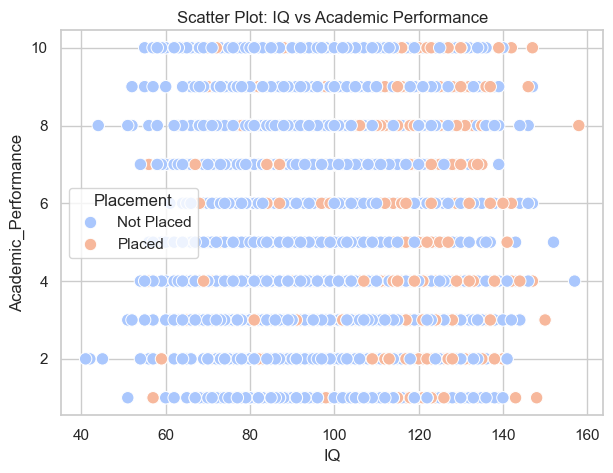

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='IQ',
    y='Academic_Performance',
    hue='Placement',  # Color by placement status
    palette='coolwarm',
    s=80
)
plt.title("Scatter Plot: IQ vs Academic Performance")
plt.show()

In [ ]:
sns.pairplot(
    df,
    vars=['IQ','Academic_Performance','Extra_Curricular_Score','Communication_Skills','Projects_Completed'],
    hue='Placement',
    diag_kind='kde',
    palette='husl'
)
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

In [ ]:
# Convert Placement to numeric labels for model comparison (if not already)
df['Placement_Label'] = df['Placement'].map({'Placed': 1, 'Not Placed': 0})

# Example: use a simple model prediction (or replace y_pred with your own model output)
# Here, we’ll assume “Internship_Experience” predicts placement just for demonstration:
y_true = df['Placement_Label']
y_pred = (df['Internship_Experience'] > df['Internship_Experience'].median()).astype(int)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Placed','Placed'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Example")
plt.show()


In [ ]:
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()